- Umwiza Soleil
- Student number:4386019

## Data requirements 

To be able to implement my model, some data are required so that the model can be trained, tested and evaluated.
  The following data elements will help me to achieve this goal:
  
  
- Age: age of the applicant, >35 years old or <35 years old (categorical)
- EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- MainBranch: whether the applicant is a profesional developer (categorical)
- YearsCode: how long the applicant has been coding (integer)
- YearsCodePro: how long the applicant has been coding in a professional context, (integer)
- PreviousSalary: the applicant's previous job salary (float)
- ComputerSkills: number of computer skills known by the applicant (integer)
- Employed: target variable, whether the applicant has been hired (categorical)



## Data collection


> This data is available publicly on Kaggle website, and can be downloaded freely
 70K+ job applicants data (Human Resource). (2023, 10 juli). Kaggle. https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource

In [ ]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import the ML libs
import sklearn
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')


print("scikit-learn version:", sklearn.__version__)    
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)  
print("matplotlib version:", matplotlib.__version__) 

#### Data understanding

##### Exploratory Data Analysis

 Below I am reading the dataset as a Pandas' dataframe and print its shape(number of rows and columns)

In [2]:
df = pd.read_csv("JobPosting.csv", index_col=0)
print(df.shape)

(73462, 14)


Viewing 10 random rows from the dataframe

In [3]:
df.sample(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
65474,>35,No,Other,1,Man,No,Dev,20,18,Russian Federation,62340.0,Go;Docker;Kubernetes;ASP.NET Core ;Microsoft S...,7,0
48909,>35,No,Other,1,Man,No,Dev,35,30,Netherlands,99816.0,Assembly;C;C++;Delphi;HTML/CSS;JavaScript;Home...,11,1
25406,<35,No,Undergraduate,1,Man,Yes,Dev,10,0,United States of America,55000.0,Bash/Shell;HTML/CSS;JavaScript;Kotlin;TypeScri...,8,0
1348,<35,No,Undergraduate,1,Man,Yes,Dev,15,4,Germany,54480.0,Bash/Shell;C#;C++;HTML/CSS;Java;Python;SQL;Doc...,16,1
10794,<35,No,Undergraduate,1,Man,No,Dev,9,6,United States of America,140000.0,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,17,1
6015,<35,No,Undergraduate,1,Man,No,Dev,7,6,India,18150.0,HTML/CSS;JavaScript;PHP;Git;Angular;Angular.js...,8,0
6869,<35,No,Master,1,Man,Yes,Dev,8,1,Italy,20760.0,Bash/Shell;C;Erlang;Haskell;HTML/CSS;Java;Java...,16,1
58344,>35,No,Undergraduate,0,Man,Yes,Dev,28,28,United States of America,110000.0,HTML/CSS;JavaScript;PHP;SQL;Homebrew;jQuery;La...,12,0
61460,<35,No,Undergraduate,0,Man,Yes,Dev,4,2,Kenya,10296.0,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScri...,21,1
33054,<35,No,Undergraduate,1,Man,Yes,Dev,9,7,United States of America,135000.0,Go;HTML/CSS;JavaScript;TypeScript;Docker;Git;Y...,12,0


Here I am globally looking at the data. I did that by printing the data info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 8.4+ MB


From the result above We can see that non-null for the column `HaveWorkedWith` are less than rest of the columns.
Below we are looking at the number of rows where the column has null values.

In [5]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

Checking the number of occurrences of each educational level

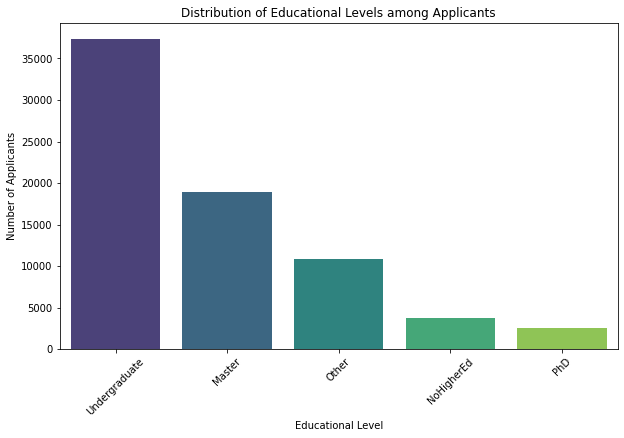

In [6]:

education_counts = df['EdLevel'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Distribution of Educational Levels among Applicants')
plt.xlabel('Educational Level')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

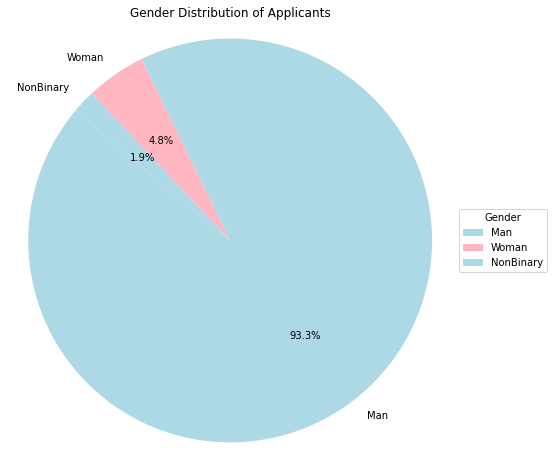

In [7]:
# Count occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Applicants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

 Above we see that a significantly larger portion of the pie chart represents male applicants compared to female applicants, we can conclude that more men are applying for the job compared to women.

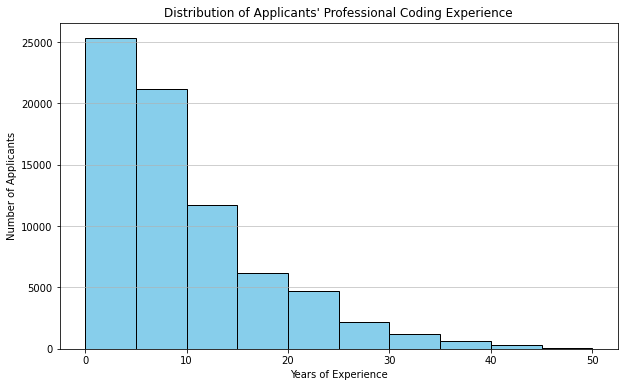

In [8]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Applicants\' Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', alpha=0.75)
plt.show()

Checking duplicate rows in the dataset

In [9]:
df[df.duplicated(keep=False)]

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
3134,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
6652,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
6664,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
7280,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7329,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7783,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
45964,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1
46025,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1


# Predictions

## ⚙️ Preprocessing

Droping rows with null values together with duplicated rows

In [10]:
df.dropna(inplace=True)

In [11]:
df=df.drop_duplicates(keep='first', ignore_index=True)

In [12]:
df.shape

(73395, 14)

 # 🧬 Modelling
 
In this step only the train set is used to fit the model, which in this case uses KNeighborsClassifier algorithm for classification from Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Assigning feature and target to variables

In [13]:
X = df.drop(['Employed'],axis=1)
y = df['Employed']

#### Using TF-IDF as a text tokenizer and vectorizer

The goal of using tf-idf is that it not only focuses on the frequency of words present in a text, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t

In [14]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['HaveWorkedWith']).toarray()
tf_X_vectorized.shape

(73395, 100)

Make a dataframe of the vectorized data and view the result

In [15]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
69957,0.000000,0.000000,0.0,0.000000,0.0,0.151133,0.000000,0.181062,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,Bash/Shell;HTML/CSS;JavaScript;PHP;Python;SQL;...
17513,0.000000,0.000000,0.0,0.439206,0.0,0.000000,0.205314,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.241412,0.0,0.0,0.218971,C#;HTML/CSS;JavaScript;PowerShell;Python;SQL;D...
43073,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.288222,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,C#;PowerShell;Python;Scala;SQL;Microsoft Azure...
39236,0.237228,0.304164,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.122200,0.237228,0.0,0.000000,0.0,0.174673,0.0,0.0,0.000000,C;C#;C++;Dart;Go;HTML/CSS;Java;JavaScript;Node...
14202,0.000000,0.130642,0.0,0.272986,0.0,0.097687,0.127612,0.117032,0.0,0.0,...,0.104973,0.000000,0.0,0.216415,0.0,0.150048,0.0,0.0,0.136100,Bash/Shell;C;C#;C++;HTML/CSS;Java;JavaScript;N...


## 🪓 Splitting into train/test

Splitting train and test data. Train data takes 80% and Test 20%

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 73395 observations, of which 58716 are now in the train set, and 14679 in the test set.


In [70]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

## Running the model with KNeighborsClassifier

In [71]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8630696913958716


Using KNN with Tfid FVectorizer we are getting an accuracy of 86%. We can run our model on train and test data and compare their classification results and check if this performance is not an overfitting or underfitting.

We can see a difference of 5% on training and test data accuracy, so we can say that there is a slight overfitting. Next we will perform hyperparameters tuning and see if the performance will improve.

In [ ]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

In the above model we used default values of hyperparameters, for example n_neighbors (K) is 5 by default.

Let's search an optimal K value which will improve our model with less error rate. We are going to run the KNeighborsClassifier model with K values in range 1 to 10 and visualize in a plot to see which K will produce minimal error rate.

Minimum error:  0.12984535731316849 at K = 9


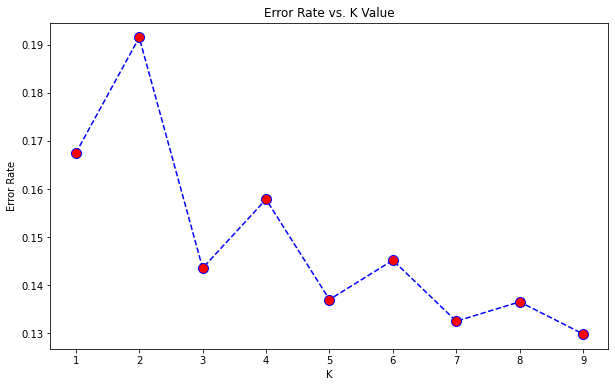

In [33]:
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

We find that at K=9 the model produces the lowest error rate of 0.13, and we are validating this by plotting the accuracy against K values and got the best accuracy of 86,8% when K=9

Maximum accuracy:  0.8701546426868315 at K = 9


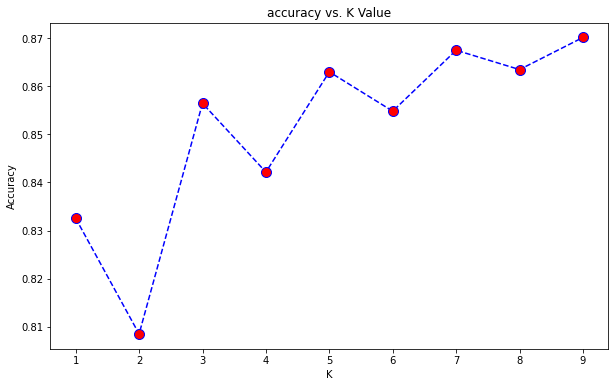

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

Use the optimal K value of 9 and the model scored 86,8%

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8701546426868315


We can now see that the model's performance slight improved by 0.08%

In [36]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27235
           1       0.91      0.89      0.90     31481

    accuracy                           0.90     58716
   macro avg       0.90      0.90      0.90     58716
weighted avg       0.90      0.90      0.90     58716

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6770
           1       0.89      0.86      0.88      7909

    accuracy                           0.87     14679
   macro avg       0.87      0.87      0.87     14679
weighted avg       0.87      0.87      0.87     14679



## Running model with Random Forest Classifier

In this step only the train set is used to fit the model, which in this case uses a Random forest Classifier algorithm for classification named sklearn.ensemble. Ref: RandomForestClassifier. (n.d.-b). Scikit-learn. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

In [37]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
52120,0.0,0.348075,0.000000,0.0,0.0,0.260272,0.0,0.000000,0.0,0.0,...,0.279683,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,Java;PowerShell;TypeScript;Kubernetes;Angular;...
54673,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.299577,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,Bash/Shell;C++;HTML/CSS;JavaScript;Python;SQL;...
57180,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.607774,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,Bash/Shell;C;Python
63885,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.419811,0.000000,0.0,0.0,0.000000,C++;Java;Kotlin;PHP;SQL;Docker;Drupal;Laravel;...
57029,0.0,0.000000,0.425229,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.244421,0.0,0.0,0.0,0.000000,0.349377,0.0,0.0,0.316899,HTML/CSS;Java;JavaScript;SQL;TypeScript;Ansibl...


In [ ]:

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

In [39]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

In [54]:

classifier=RandomForestClassifier().fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.9647114926084883

In [56]:
confusion_matrix(y_test,y_pred)

array([[6550,  220],
       [ 298, 7611]], dtype=int64)

## Evaluation

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6770
           1       0.97      0.96      0.97      7909

    accuracy                           0.96     14679
   macro avg       0.96      0.96      0.96     14679
weighted avg       0.96      0.96      0.96     14679



Looking at the accuracy score we see that this model perform very well compare to KNN as it is predicting with 96% accuracy.

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))